In [3365]:
import sys
import os
import numpy as np
import pandas
import math
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import expit
from sympy import *
import scipy.optimize as opt
%matplotlib inline

In [1792]:
def cubicFunction(x):
    try:
        ans = (16*pow(x,4) - 32*pow(x,3) - 8*pow(x,2) + 10*x + 9)/1.0
        return ans
    except OverflowError as err:
        print "Overflow Detected in f(x)"

In [1793]:
X = np.linspace(-2,3,100)
Y = np.zeros_like(X)
k = 0
for i in X:
    Y[k] = cubicFunction(i)
    k += 1

Text(0.5,1,u'Plot of 16x^4 - 32x^3 - 8x^2 + 10x + 9')

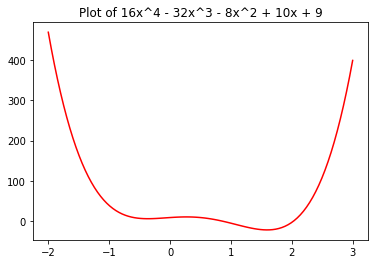

In [1794]:
plt.plot(X,Y,'r')
plt.title('Plot of 16x^4 - 32x^3 - 8x^2 + 10x + 9')

In [3370]:
xs = Symbol('x')
fdash = cubicFunction(xs).diff(xs)
print opt.fmin(cubicFunction, 0)
print opt.fmin(cubicFunction, 1)

Optimization terminated successfully.
         Current function value: 6.124226
         Iterations: 22
         Function evaluations: 44
[-0.36425]
Optimization terminated successfully.
         Current function value: -21.696233
         Iterations: 15
         Function evaluations: 30
[ 1.5953125]


In [1795]:
# derivative of the fucntion we have defined
def derivative(x):
    try:
        ans = 64*pow(x,3) - 96*pow(x,2) - 16*x + 10
        return ans
    except OverflowError as err:
        print "Overflow Detected :: derivative"

In [1796]:
def gradientDescent(x,eta,steps):
    ans = []
    try:
        for i in range(0,steps):
            x = x - eta*derivative(x)
            ans.append((x,cubicFunction(x)))
        return ans
    except:
        print "Something went wrong"

In [3395]:
# setting up the step size for gradient descent
eta = 0.001
x = -1 # starting point for gradient descent
# Running gradient descent
ans = gradientDescent(x,eta,5)
ans[-5:]

[(-0.866, 24.122076702976),
 (-0.776294662656, 17.196933470898333),
 (-0.7109220204970491, 13.432358919601501),
 (-0.6607817416581312, 11.182090980505741),
 (-0.6209723259625907, 9.746936730571225)]

In [3396]:
x = -1
ans = gradientDescent(x,eta,1000)
# Reporting the last 5 values
ans[-5:]

[(-0.36422374257061546, 6.124226461427285),
 (-0.36422374257061546, 6.124226461427285),
 (-0.36422374257061546, 6.124226461427285),
 (-0.36422374257061546, 6.124226461427285),
 (-0.36422374257061546, 6.124226461427285)]

Yes, according to the values above, we can notice that the value of x has converged.
Gradient Descent has found a minimum. The value of x at which gradient descent has found a minmum is the local minimum. We can say this because the value of x is negative (-0.36) where the local minima occurs as we can verify from the graph plotted above

In [3398]:
x = 2
ans = gradientDescent(x,eta,5)
ans[-5:]

[(1.894, -12.280893572864002),
 (1.823848257024, -16.471988590606028),
 (1.7740854376290425, -18.621275496013634),
 (1.7372611541368062, -19.813420352480247),
 (1.7092287072971393, -20.51063658566802)]

In [3401]:
x = 2
ans = gradientDescent(x,eta,1000)
ans[-5:]

[(1.5953147000510859, -21.696233024904366),
 (1.5953147000510859, -21.696233024904366),
 (1.5953147000510859, -21.696233024904366),
 (1.5953147000510859, -21.696233024904366),
 (1.5953147000510859, -21.696233024904366)]

Yes, according to the values above, we can notice that the value of x has converged.
Gradient Descent has found a minimum. The value of x at which gradient descent has found a minmum is the global minimum. We can say this because the value of x is positive (1.595) where the global minimum occurs as we can verify from the graph plotted above

In [3410]:
ans = gradientDescent(-1,.01,1000)

In [3411]:
ans[:5]

[(0.3400000000000001, 10.43128576),
 (0.38022144000000013, 10.221092268269524),
 (0.44466297051775, 9.676878465941176),
 (0.5493557211358288, 8.231163257954496),
 (0.7208664355233224, 4.384921376586129)]

In [3412]:
ans[5:10]

[(0.9953254006215324, -4.822543299773962),
 (1.3745565522920227, -18.359057075000234),
 (1.646174283580392, -21.471761448124713),
 (1.5560478035180898, -21.572196325826845),
 (1.6181625286423753, -21.651974555361676)]

In [3413]:
ans[-5:]

[(1.5953147000510854, -21.69623302490436),
 (1.5953147000510852, -21.69623302490436),
 (1.5953147000510854, -21.69623302490436),
 (1.5953147000510852, -21.69623302490436),
 (1.5953147000510854, -21.69623302490436)]

With the new value of eta we were able to reach the global minimum even with the same starting point as -1. Using too small eta made gradient descent stay within the local minimum and could not et out of the trap. Using a larger eta changed the problem.

In [3380]:
ans  = gradientDescent(-1,.05,100)

Overflow Detected in f(x)
Overflow Detected in f(x)
Overflow Detected :: derivative
Something went wrong


## Explanation
    Our function has only one local minima and one global maxima. When we set eta to 0.05 (particularly >.03) we get Overflow error. This is happening because at the `x` which is being produced by gradient descent, our function is almost straight. Therefore both the derivative and the function are Overflowing

In [3058]:
data = pd.read_csv('sonar.csv', header=None)

In [3059]:
data.iloc[:5]

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0190,0.0038,0.0642,0.0452,0.0333,0.0690,0.0901,0.1454,0.0740,0.0349,...,0.0093,0.0118,0.0112,0.0094,0.0140,0.0072,0.0022,0.0055,0.0122,Rock
1,0.0151,0.0320,0.0599,0.1050,0.1163,0.1734,0.1679,0.1119,0.0889,0.1205,...,0.0061,0.0015,0.0084,0.0128,0.0054,0.0011,0.0019,0.0023,0.0062,Rock
2,0.0712,0.0901,0.1276,0.1497,0.1284,0.1165,0.1285,0.1684,0.1830,0.2127,...,0.0154,0.0156,0.0054,0.0030,0.0048,0.0087,0.0101,0.0095,0.0068,Mine
3,0.1088,0.1278,0.0926,0.1234,0.1276,0.1731,0.1948,0.4262,0.6828,0.5761,...,0.0455,0.0213,0.0082,0.0124,0.0167,0.0103,0.0205,0.0178,0.0187,Mine
4,0.0086,0.0215,0.0242,0.0445,0.0667,0.0771,0.0499,0.0906,0.1229,0.1185,...,0.0072,0.0054,0.0022,0.0016,0.0029,0.0058,0.0050,0.0024,0.0030,Rock


In [3321]:
#Converting Class labels
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]
y = [1 if x == 'Mine' else 0 for x in y.values]
y = np.transpose(np.asmatrix(y))
X = np.transpose(X)
y.shape

(180, 1)

In [3061]:
weights = pd.DataFrame(np.zeros(X.shape[0]))
weights[:] = .5
weights.shape

(60, 1)

In [3062]:
def sigmoid(X,W,w0):
    linear = (np.matmul(np.transpose(W),X) + w0)/1.0
    exp = expit(linear)
    #exp = np.exp(linear)/1.0
    #return 1.0/(1 + exp)
    return exp

In [3063]:
def L2Norm(weights):
    square_weights = np.square(weights)
    sum_of_square_weights = np.sum(square_weights)
    return math.sqrt(sum_of_square_weights)

In [3064]:
def gradientDescentLR(data,iters, rate,local_weights,w0):
    error = []
    #error.append(crossEntropyError(data,np.full(180,1),local_weights,w0))
    for j in range(iters):
        yt = sigmoid(X,local_weights,w0)
        yt = np.transpose(yt)
        diff = y - yt
        local_weights = local_weights + rate*(np.matmul(X,diff))
        w0 = w0 + rate*diff.sum()
        error.append(crossEntropyError(data,y,local_weights,w0))
    return local_weights, w0, error

In [3065]:
def crossEntropyError(X,r,weights,wo):
    yt = sigmoid(X,weights,wo)
    for i in range(yt.shape[1]):
        if yt[0][i] < np.exp(-16):
            yt[0][i] = np.exp(-16)
    one_minus_yt = 1 - yt
    for i in range(one_minus_yt.shape[1]):
        if one_minus_yt[0][i] < np.exp(-16):
            one_minus_yt[0][i] = np.exp(-16)
    logYt = np.log(yt)
    log_One_minus_yt = np.log(one_minus_yt)
    #error = -(logYt*r + log_One_minus_yt*(1-r))
    error = -(np.matmul(logYt,r) + np.matmul(log_One_minus_yt,1-r))
    return error

In [3066]:
def predict(x,weights,wo):
    classifications = []
    y = sigmoid(x,weights,wo)
    for val in np.nditer(y):
        if val > 0.5:
            classifications.append(1)
        else:
            classifications.append(0)
    return classifications

In [3067]:
def calculateClassificationError(r,y):
    error = 0
    for i in range(r.shape[0]):
        if r[i] != y[i]:
            error += 1
    return error*100.0/r.shape[0]

In [3069]:
error = calculateClassificationError(y,predictions)

Rate 0.001 cross error :: 102.695001295 classification error :: 28.3333333333% and L2Norm :: 2.61565476966
Rate 0.01 cross error :: 152.48539954 classification error :: 36.1111111111% and L2Norm :: 6.59687582841
Rate 0.05 cross error :: 759.86320188 classification error :: 36.1111111111% and L2Norm :: 32.7597411458
Rate 0.1 cross error :: 930.220966831 classification error :: 36.6666666667% and L2Norm :: 65.0075032233
Rate 0.5 cross error :: 1024.83557566 classification error :: 36.6666666667% and L2Norm :: 324.2618561
Rate 1.0 cross error :: 1047.44078536 classification error :: 36.6666666667% and L2Norm :: 649.271427939
Rate 1.5 cross error :: 1056.34449418 classification error :: 36.6666666667% and L2Norm :: 973.892726438


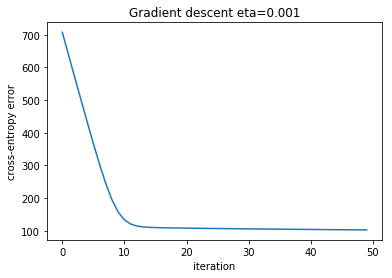

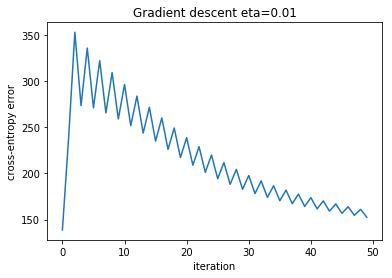

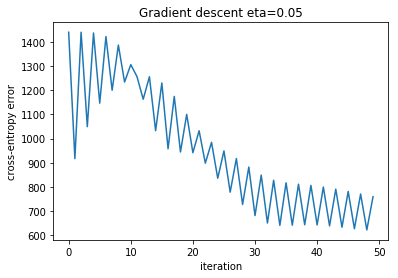

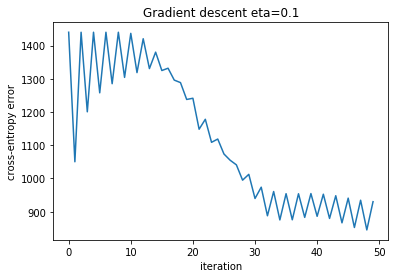

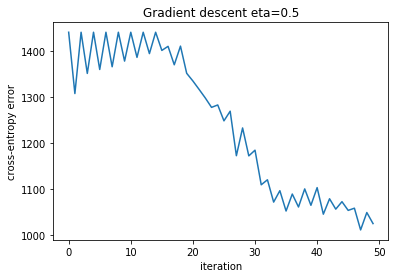

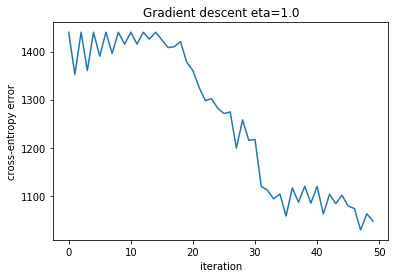

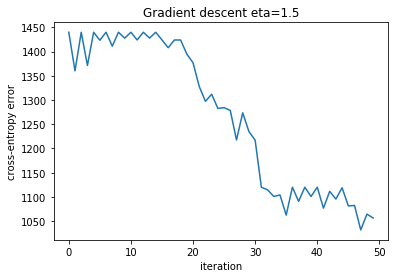

In [3070]:
weights_only = {}
errors = np.zeros(50)
iters = 50
for rate in [.001,.01,.05,0.1,0.5,1.0,1.5]:
    fig = plt.figure()
    plt.title('Gradient descent eta={}'.format(rate))
    plt.ylabel('cross-entropy error')
    plt.xlabel('iteration')
    solution = gradientDescentLR(X,iters,rate,weights,0.5)
    py = [solution[2][i].item(0) for i in range(len(solution[2]))]
    weights_only[rate] = solution[0:2]
    plt.plot(py, label="eta={}".format(rate))
    cross_error = crossEntropyError(X,y,weights_only[rate][0],weights_only[rate][1])
    predictions = predict(X,weights_only[rate][0],weights_only[rate][1])
    error_rate = calculateClassificationError(y,predictions)
    l2Norm = L2Norm(weights_only[rate][0])
    print "Rate " + str(rate) + " cross error :: " + str(cross_error.item()) + " classification error :: " + str(error_rate) + "% and L2Norm :: " + str(l2Norm)

In [3071]:
def gradientDescentLRWithRegularisation(data,y_local,iters,rate,local_weights,w0,_lambda):
    error = []
    for j in range(iters):
        yt = sigmoid(data,local_weights,w0)
        yt = np.transpose(yt)
        diff = np.subtract(y_local,yt)
        local_weights = local_weights + rate*((np.matmul(data,diff)) - (_lambda)*local_weights)
        w0 = w0 + rate*diff.sum()
        #error.append(crossEntropyErrorWithRegularization(data,y,local_weights,w0,_lambda))
    return local_weights, w0

In [3072]:
def crossEntropyErrorWithRegularization(X,r,weights,wo,_lambda):
    yt = sigmoid(X,weights,wo)
    for i in range(yt.shape[1]):
        if yt[0][i] < np.exp(-16):
            yt[0][i] = np.exp(-16)
    one_minus_yt = 1 - yt
    for i in range(one_minus_yt.shape[1]):
        if one_minus_yt[0][i] < np.exp(-16):
            one_minus_yt[0][i] = np.exp(-16)
    logYt = np.log(yt)
    log_One_minus_yt = np.log(one_minus_yt)
    #error = -(logYt*r + log_One_minus_yt*(1-r))
    error = -(np.matmul(logYt,r) + np.matmul(log_One_minus_yt,1-r)) + (_lambda/2)*(np.square(weights).sum().item())
    return error

In [3275]:
weights_only = {}
errors = np.zeros(50)
iters = 50
for _lambda in [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]:
    for rate in [0.001]:
        solution = gradientDescentLRWithRegularisation(X,y,iters,rate,weights,0.5,_lambda)
        weights_only[rate] = solution
        cross_error = crossEntropyErrorWithRegularization(X,y,weights_only[rate][0],weights_only[rate][1],_lambda)
        predictions = predict(X,weights_only[rate][0],weights_only[rate][1])
        error_rate = calculateClassificationError(y,predictions)
        l2Norm = L2Norm(weights_only[rate][0])
        print "Lambda " + str(_lambda) + " cross entropy error :: " + str(cross_error.item()) + " classification error :: " + str(error_rate) + "% and L2Norm :: " + str(l2Norm)

Lambda 0 cross entropy error :: 102.695001295 classification error :: 28.3333333333% and L2Norm :: 2.61565476966
Lambda 0.05 cross entropy error :: 102.884414277 classification error :: 28.3333333333% and L2Norm :: 2.60974858562
Lambda 0.1 cross entropy error :: 103.072319956 classification error :: 28.3333333333% and L2Norm :: 2.60385691692
Lambda 0.2 cross entropy error :: 103.443651365 classification error :: 28.3333333333% and L2Norm :: 2.59211698406
Lambda 0.3 cross entropy error :: 103.809078779 classification error :: 27.7777777778% and L2Norm :: 2.58043468893
Lambda 0.4 cross entropy error :: 104.168684385 classification error :: 27.7777777778% and L2Norm :: 2.56880975075
Lambda 0.5 cross entropy error :: 104.522549314 classification error :: 27.7777777778% and L2Norm :: 2.55724189014


In [3276]:
def dataParts(data,k):
    _y = data.iloc[:,-1:]
    data = data.iloc[:,:-1]
    ydata = []
    cvdata = []
    size = data.shape[0]
    partsize = int(size*1.0/k)
    for i in range(k):
        ydata.append(_y.iloc[i*partsize:(i+1)*partsize])
        cvdata.append(data.iloc[i*partsize:(i+1)*partsize])
    return cvdata, ydata

In [3277]:
databyparts, resultbyparts = dataParts(data,5)

In [3362]:
# performing Cross Validation
def crossValidation(data,weights,resultbyparts,originalX,originalY,_lambda):
    tcerror = 0 
    for i in range(len(data)):
        test = []
        testy = []
        
        training = []
        trainingy= []
        
        test.append(data[i])
        test = np.transpose(np.concatenate(test))
        
        testy = resultbyparts[i]
        testy = [1 if testy.values[_i][0] == 'Mine' else 0 for _i in range(len(testy))]
        testy = np.transpose(np.asmatrix(testy))
        
        #calculating training part
        for k in range(len(data)):
            if k != i:
                training.append(data[k])
                trainingy.append(resultbyparts[k])
        training = np.transpose(np.concatenate(training))
        trainingy = [1 if x == 'Mine' else 0 for _y in trainingy for x in _y.values ]
        trainingy = np.transpose(np.asmatrix(trainingy))
        local_weights, wo = gradientDescentLRWithRegularisation(training,trainingy,50,0.001,weights,0.5,_lambda)
        tcerror += calculateClassificationError(originalY,predict(originalX,local_weights,wo))
        
#        cross_entropy = crossEntropyErrorWithRegularization(training,trainingy,local_weights,wo,_lambda)
    return tcerror/len(data)

In [3374]:
for _lambda in [0,.005,0.1,0.2,0.3,0.4,0.5]:
    print "Lambda := " + str(_lambda) + "  CV Error := " + str(crossValidation(databyparts,weights,resultbyparts,X,y,_lambda))

Lambda := 0  CV Error := 30.0
Lambda := 0.005  CV Error := 30.0
Lambda := 0.1  CV Error := 30.0
Lambda := 0.2  CV Error := 29.7777777778
Lambda := 0.3  CV Error := 29.6666666667
Lambda := 0.4  CV Error := 29.6666666667
Lambda := 0.5  CV Error := 29.6666666667
